In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.
/home/sina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sina/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
df_train = pd.read_csv('./dataSets/Train_set.csv', index_col=0)
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,H9_1,H9_2,H9_3,H9_4,H9_5,H9_6,H9_7,H9_8,H9_9,answer
id,,,,,,,,,,,,,,,,,,,,,
0,6.146785,2.133139,-4.653774,0.693628,6.820853,14.227133,-2.978459,2.215045,-2.502171,-4.632520,...,-1.701423,-0.910841,-1.221330,1.096332,-1.242307,-0.778840,-0.295269,0.705613,-1.244086,0.023331
1,1.609087,-6.488207,-5.651190,-1.342380,-0.278201,-14.961204,-3.672646,-9.220319,-8.886766,-10.709604,...,0.685009,-1.226168,1.315377,0.354016,-1.272464,0.492312,-1.554028,-0.304290,0.744597,0.037535
2,6.452435,-6.910935,1.396967,11.367430,6.552601,7.064972,9.333542,2.521211,-4.589797,4.264135,...,0.002065,-0.378500,-0.682500,-0.765185,-2.421619,0.677586,0.332700,-0.378814,-2.282929,0.032100
3,-5.577213,-0.951464,-9.371340,-5.077316,-7.869043,-12.343066,-4.394334,7.071570,2.127494,-8.502430,...,-0.596220,0.254588,-0.517738,-1.173655,-0.043269,0.835443,-0.361403,-0.040862,-1.381211,0.028621
4,-2.009619,-8.123008,3.196433,9.815934,2.126663,9.770889,6.359276,0.102219,7.332281,6.551056,...,0.517961,0.127462,0.931622,-1.043907,3.083552,-0.535111,1.050816,-1.395170,0.527026,0.036660


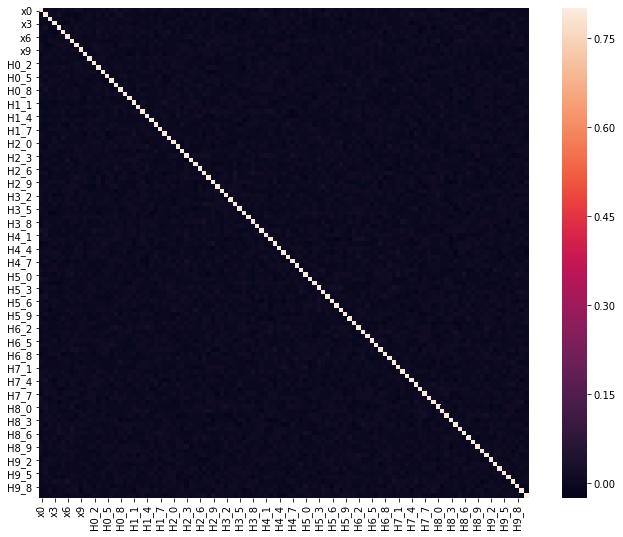

In [3]:
import seaborn as sns
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

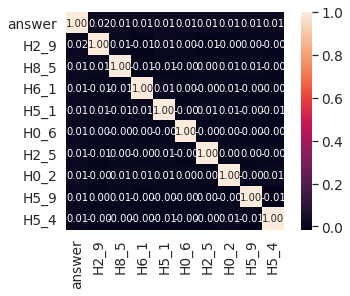

In [4]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'answer')['answer'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [57]:
df_train = pd.get_dummies(df_train)
df_train = df_train.fillna(df_train.mean())
# df_train.head()
scale = StandardScaler()
Y = df_train['answer'].values
X = df_train.drop('answer',axis = 1)
X = scale.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
Y_train *= 1000
Y_test *= 1000
print(Y_train)
print(Y_test)

[29.59412636 32.78624493 37.98614987 ... 38.56046892 30.49314798
 33.59313081]
[27.82370463 30.64300554 25.23789798 ... 20.58480467 22.88964757
 23.67735647]


In [88]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(180, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 180)               19980     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 181       
Total params: 20,161
Trainable params: 20,161
Non-trainable params: 0
_________________________________________________________________


In [89]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=150,batch_size=20,shuffle=True,callbacks=[earlystopper])

Train on 12800 samples, validate on 3200 samples
Epoch 1/150
12800/12800 [==============================] - 1s 81us/step - loss: 221.5173 - mean_absolute_error: 11.3470 - val_loss: 53.3489 - val_mean_absolute_error: 5.8096
Epoch 2/150
12800/12800 [==============================] - 1s 66us/step - loss: 51.6783 - mean_absolute_error: 5.7581 - val_loss: 52.6031 - val_mean_absolute_error: 5.7760
Epoch 3/150
12800/12800 [==============================] - 1s 58us/step - loss: 48.5189 - mean_absolute_error: 5.5811 - val_loss: 53.1320 - val_mean_absolute_error: 5.7839
Epoch 4/150
12800/12800 [==============================] - 1s 59us/step - loss: 46.0897 - mean_absolute_error: 5.4337 - val_loss: 52.5566 - val_mean_absolute_error: 5.7447
Epoch 5/150
12800/12800 [==============================] - 1s 58us/step - loss: 44.1089 - mean_absolute_error: 5.3151 - val_loss: 52.2676 - val_mean_absolute_error: 5.7216
Epoch 6/150
12800/12800 [==============================] - 1s 59us/step - loss: 42.5574 -

In [90]:
model.evaluate(X_test, Y_test)
# model.evaluate(X_train, Y_train)

4000/4000 [==============================] - 0s 21us/step


[64.83846124267578, 6.423537254333496]

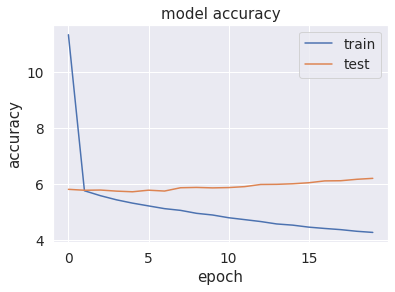

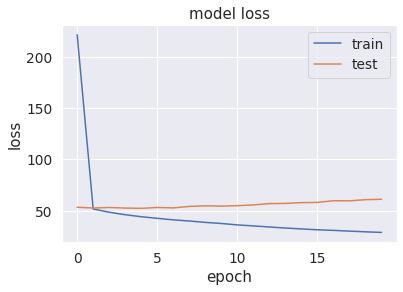

In [91]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [92]:

predictions = model.predict(X_test[:5])
# print the predictions
print(predictions.T)
print(Y_test[:5])
# array([15.2, 42.3])

[[31.860704 32.1314   26.44525  30.394136 29.875454]]
[27.82370463 30.64300554 25.23789798 25.823595   21.74745103]


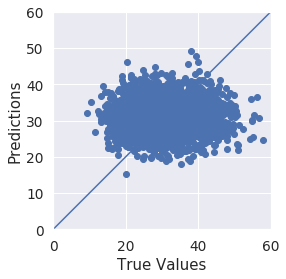

In [93]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)